# UNDERSTANDING RETAIL CONSUMERS

In Unit 6, we saw how clustering can be used for market segmentation, the idea of dividing airline passengers into small, more similar groups, and then designing a marketing strategy specifically for each group.  In this problem, we'll see how this idea can be applied to retail consumer data.

In this problem, we'll use the dataset Households.csv, which contains data collected over two years for a group of 2,500 households.  Each row (observation) in our dataset represents a unique household.  The dataset contains the following variables:

* NumVisits = the number of times the household visited the retailer 
* AvgProdCount = the average number of products purchased per transaction
* AvgDiscount = the average discount per transaction from coupon usage (in %) - NOTE: Do not divide this value by 100!
* AvgSalesValue = the average sales value per transaction
* MorningPct = the percentage of visits in the morning (8am - 1:59pm)
* AfternoonPct = the percentage of visits in the afternoon (2pm - 7:59pm)

Note that some visits can occur outside of morning and afternoon hours.  That is, visits from 8pm - 7:59am are possible.

This dataset was derived from source files provided by dunnhumby, a customer science company based in the United Kingdom.

In [1]:
households = read.csv('data/asset-v1-MITx+15.071x_2a+2T2015+type@asset+block@Households.csv')

In [2]:
str(households)

'data.frame':	2500 obs. of  6 variables:
 $ NumVisits    : int  86 45 47 30 40 250 59 113 20 9 ...
 $ AvgProdCount : num  20.08 15.87 19.62 10.03 5.55 ...
 $ AvgDiscount  : num  8.11 7.44 14.37 3.85 2.96 ...
 $ AvgSalesValue: num  50.4 43.4 56.5 40 19.5 ...
 $ MorningPct   : num  46.51 8.89 14.89 13.33 2.5 ...
 $ AfternoonPct : num  51.2 60 76.6 56.7 67.5 ...


In [3]:
summary(households)

   NumVisits       AvgProdCount     AvgDiscount     AvgSalesValue    
 Min.   :   1.0   Min.   : 1.186   Min.   : 0.089   Min.   :  2.388  
 1st Qu.:  39.0   1st Qu.: 6.123   1st Qu.: 3.006   1st Qu.: 18.329  
 Median :  79.0   Median : 8.979   Median : 4.865   Median : 27.417  
 Mean   : 110.6   Mean   :10.291   Mean   : 5.713   Mean   : 31.621  
 3rd Qu.: 142.2   3rd Qu.:13.116   3rd Qu.: 7.327   3rd Qu.: 40.546  
 Max.   :1300.0   Max.   :56.600   Max.   :47.176   Max.   :165.829  
   MorningPct      AfternoonPct   
 Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 16.67   1st Qu.: 42.20  
 Median : 26.09   Median : 52.00  
 Mean   : 28.73   Mean   : 51.45  
 3rd Qu.: 37.17   3rd Qu.: 61.29  
 Max.   :100.00   Max.   :100.00  

In [10]:
households$AvgDiscount[households$AvgSalesValue > 150]

[1] 18.49893 27.18406 15.64607 29.94897

In [12]:
min(households$AvgSalesValue[households$AvgDiscount > 25])

[1] 50.1175

In [15]:
length(households$NumVisits[households$NumVisits >= 300]) / nrow(households)

[1] 0.0592

In [16]:
library(caret)
Households = households
preproc = preProcess(Households)

HouseholdsNorm = predict(preproc, Households)

Warning message:
: package ‘caret’ was built under R version 3.2.4Loading required package: lattice
Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

In [17]:
max(HouseholdsNorm$NumVisits)

[1] 10.28281

In [18]:
min(HouseholdsNorm$AfternoonPct)

[1] -3.228427

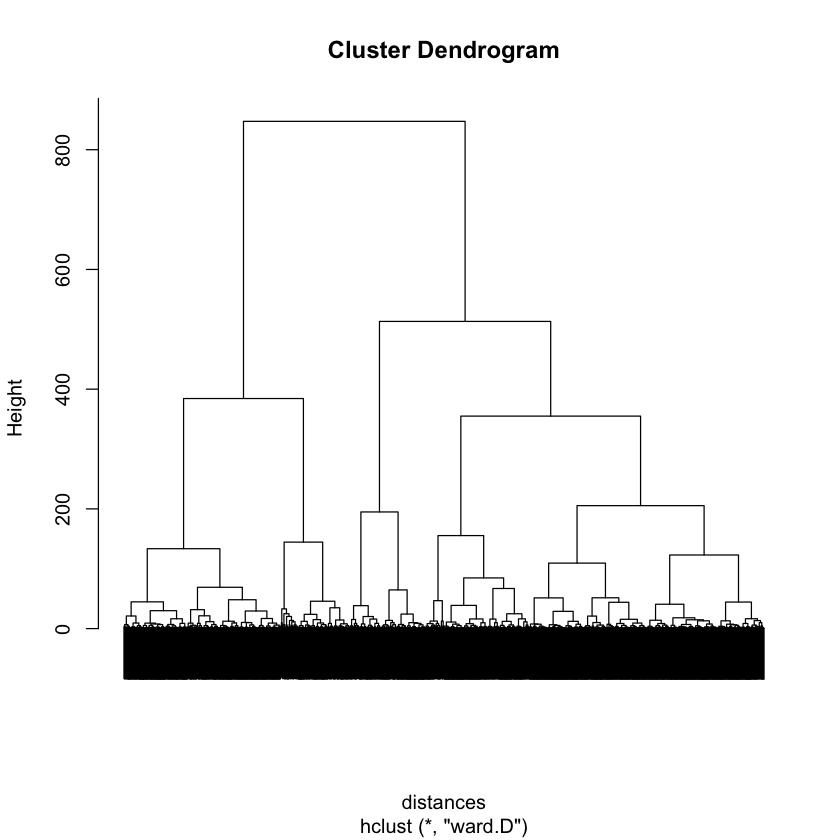

In [19]:
set.seed(200)
distances <- dist(HouseholdsNorm, method = "euclidean")
ClusterShoppers <- hclust(distances, method = "ward.D")
plot(ClusterShoppers, labels = FALSE)